# Exercise 05


## Using the example_retail_sales dataset:
- Standarize the dataset using np.log
- Using prophet forescast the next 6 months of the sales logarithm
- Predict the next 6 months of sales
- Rolling forecast del último 10% de las fechas

## FORECAST PARA LAS VENTAS LOGARÍTMICAS

In [2]:
#Cargue de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

#Cargue de la base
data = pd.read_csv('example_retail_sales.csv')
 
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['ds']) 
df['y'] = np.log(data['y'])#transformación logarítmica de las ventas

print(df.head())

          ds          y
0 1992-01-01  11.893934
1 1992-02-01  11.898725
2 1992-03-01  11.978770
3 1992-04-01  12.005601
4 1992-05-01  12.043954


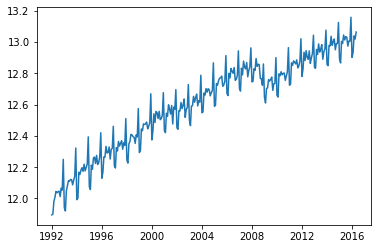

In [47]:
#Plot de la serie de tiempo logaritmíca de las ventas
fig, ax = plt.subplots(1,1)
ax.plot(df['ds'].values, df['y'].values) 

In [3]:
#Cargar Modelo Prophet
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
#Elaborar el dataframe para las predicciones futuras de los próximos 6 meses
future = m.make_future_dataframe(periods=6, freq='M')
future.tail()

,ds
294,2016-06-30
295,2016-07-31
296,2016-08-31
297,2016-09-30
298,2016-10-31


In [5]:
#Realizar la predicción para los próximos 6 meses de las ventas(log)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-06-30,13.057717,13.037226,13.078570
295,2016-07-31,13.082380,13.061926,13.102917
296,2016-08-31,13.015577,12.994424,13.035144
297,2016-09-30,13.037937,13.017145,13.059387
298,2016-10-31,13.055811,13.034168,13.075390


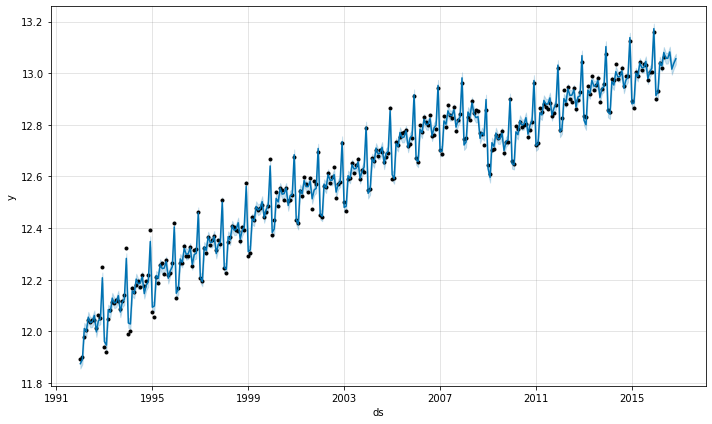

In [14]:
#Plot de la serie junto a los 6 meses predichos
fig1 = m.plot(forecast)

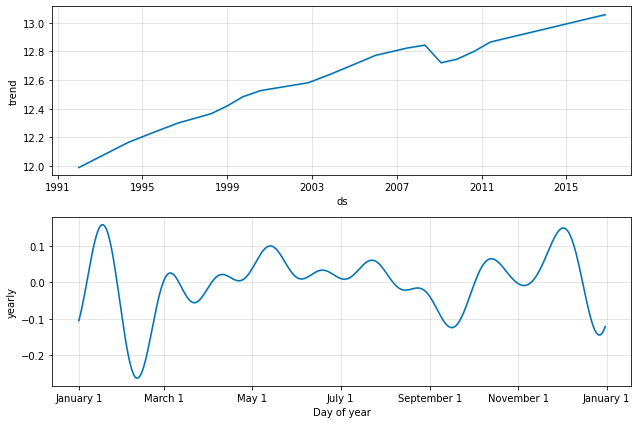

In [15]:
#Tendencia y Estacionalidad 
m.plot_components(forecast);

## Conclusión Pronostico Ventas Logarítmicas

La serie muestra una tendencia al alza de las ventas del retail, con una unica caida entre los años 2008 y 2009, que podría estar asociada a la crisis financiera de las hipotecas. Respecto al componente estacional, se observa un comportamiento constante entre marzo y noviembre, exceptuando el mes de diciembre donde las ventas alcanzan el pico máximo del año.

## FORECAST VENTAS

In [9]:
#Cargue de la base
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['ds']) 
df['y'] = data['y']#Sin transformación

print(df.head())

          ds       y
0 1992-01-01  146376
1 1992-02-01  147079
2 1992-03-01  159336
3 1992-04-01  163669
4 1992-05-01  170068


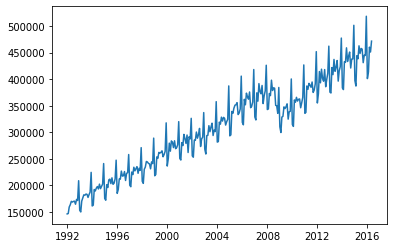

In [10]:
#Plot de la serie de tiempo logaritmíca de las ventas
fig, ax = plt.subplots(1,1)
ax.plot(df['ds'].values, df['y'].values) 

In [11]:
#Cargar Modelo Prophet
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
#Elaborar el dataframe para las predicciones futuras de los próximos 6 meses
future = m.make_future_dataframe(periods=6, freq='M')
future.tail()

,ds
294,2016-06-30
295,2016-07-31
296,2016-08-31
297,2016-09-30
298,2016-10-31


In [13]:
#Realizar la predicción para los próximos 6 meses de las ventas(log)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-06-30,470429.098324,461205.506632,480409.617235
295,2016-07-31,477511.078795,467700.782666,487618.691442
296,2016-08-31,454530.546471,443313.501950,464538.874234
297,2016-09-30,462896.353299,451970.553915,473153.928871
298,2016-10-31,468521.678045,458945.487031,478322.149846


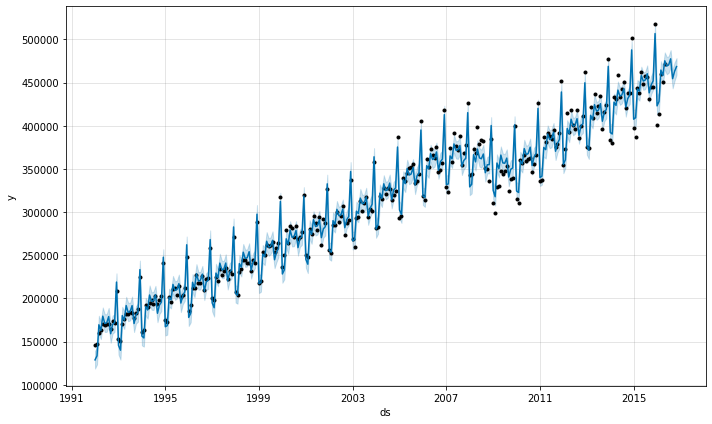

In [15]:
#Plot de la serie junto a los 6 meses predichos
fig1 = m.plot(forecast)

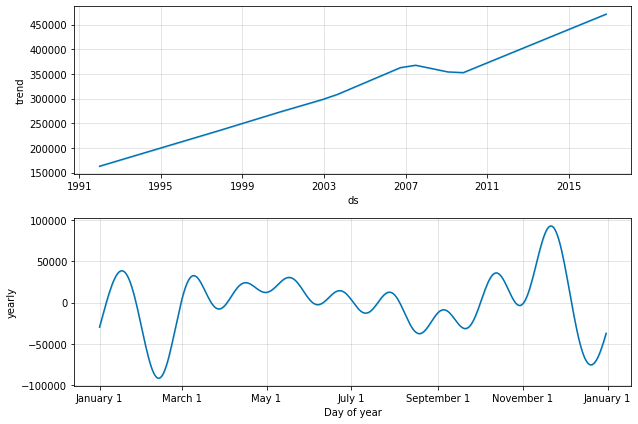

In [16]:
#Tendencia y Estacionalidad
m.plot_components(forecast);

## Conclusión Pronostico Ventas

Las conclusiones frente a la medida de las ventas no cambian respecto a las ventas medidas logaritmicamente. La serie muestra una tendencia al alza de las ventas del retail, ahora la caida entre los años 2008 y 2009, parece incluir 2010. Respecto al componente estacional, puede quedar más claro el comportamiento respecto a los valores de los niveles de ventas, ya que no se requiere realizar transformaciones para identificar que el pico de diciembre esta alrededor de las 100 mil unidades.

## Promedio Movil Prophet

In [3]:
#CArgue de la base
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['ds'])
df['y'] = (data['y'])

print(df.head())

          ds       y
0 1992-01-01  146376
1 1992-02-01  147079
2 1992-03-01  159336
3 1992-04-01  163669
4 1992-05-01  170068


In [4]:
#Definicion de test(10%) y train(90%)
X = df.values
size = int(len(X) * 0.9)

train = df[:size] 
test = pd.DataFrame(df[size:]) 
#ignore_index=True)
history = pd.DataFrame(train)

predictions = list()


testr = X[size:len(X)]

In [5]:
#Calculo del promedio movil
for t in range(len(testr)):
    m = Prophet()
    m.fit(history)
    output = m.make_future_dataframe(periods=1, freq='M')
    forecast = m.predict(output)
    yhat = forecast[['yhat']].iloc[t+size]
    predictions.append(yhat)
    obs = pd.DataFrame(test.iloc[t])
    obs = obs.transpose()
    history = history.append(obs)
    
    print(t)
    print(len(history[['y']]))
    print('predicted=%f, expected=%f' % (yhat,obs[['y']].iloc[0]))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0
264
predicted=476442.655461, expected=477205.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1
265
predicted=396997.444167, expected=383399.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2
266
predicted=407515.817536, expected=380315.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


3
267
predicted=423323.573078, expected=432806.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4
268
predicted=426042.830722, expected=431415.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


5
269
predicted=443814.378032, expected=458822.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


6
270
predicted=445839.294328, expected=433152.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


7
271
predicted=443398.967012, expected=443005.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


8
272
predicted=451793.118081, expected=450913.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


9
273
predicted=428724.704298, expected=420871.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


10
274
predicted=432485.882704, expected=437702.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


11
275
predicted=441674.835202, expected=437910.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


12
276
predicted=494667.056046, expected=501232.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


13
277
predicted=414936.934806, expected=397252.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


14
278
predicted=428044.027505, expected=386935.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


15
279
predicted=437602.808098, expected=444110.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


16
280
predicted=442578.968162, expected=438217.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


17
281
predicted=461199.118038, expected=462615.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


18
282
predicted=460375.289498, expected=448229.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


19
283
predicted=458797.551809, expected=457710.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


20
284
predicted=467791.883159, expected=456340.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


21
285
predicted=442017.841473, expected=430917.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


22
286
predicted=446466.638140, expected=444959.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


23
287
predicted=455756.144482, expected=444507.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


24
288
predicted=512257.256815, expected=518253.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


25
289
predicted=425248.263033, expected=400928.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


26
290
predicted=442404.029774, expected=413554.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


27
291
predicted=458778.121570, expected=460093.000000


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


28
292
predicted=457155.907319, expected=450935.000000
29
293
predicted=475149.009421, expected=471421.000000


In [6]:
#Calculo de la raiz del error cuadratico medio
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['y'].values, predictions)**(1/2)
print('Test MSE: %.3f' % error)

Test MSE: 13771.361


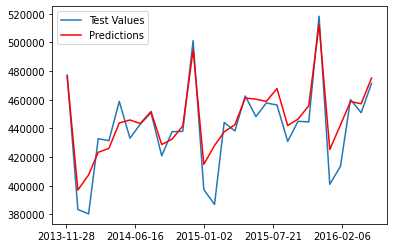

In [8]:
#Gráfica predicción
import matplotlib.pyplot as plt
import datetime
import matplotlib.ticker as ticker 
fig, ax = plt.subplots(1,1)
ax.plot(test['ds'].values, test['y'].values, label="Test Values") 
plt.plot(test['ds'].values, predictions, color='red', label="Predictions")
ax.plot()
loc = ticker.MultipleLocator(base=200.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.legend(loc="upper left")
plt.show()

## Conclusión Pronostico Media Movil

El modelo de rolling forecast con Prophet crea un pronostico muy cercano, sin embargo, aunque el MSE tiene un valor bajo (13771.361) la figura de los valores de test vs los predichos muestra que los meses que más aportan al error son los que tienen ventas bajas, es decir, los meses de enero y febrero.